#**Actividad 4 (Regresión Lineal Simple)**
##**Eduardo Ernesto Bolaños Castro A00830782**
##**Alonso Rojas Loreto A01706755**
##**Brenda Hernandez Velasquez A01701703**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('DF_Mexico.csv')
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [ ]:
df = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,19,20,21,24,25,26,27,28,29,32,35,39,49,50,55,59,60,68,69,]], axis=1)
df

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100%,NaN,3,7,19.353530,-99.162990,Entire home/apt,3,1.5 baths,1.0,...,4.95,5.00,4.95,5.00,4.86,3,3,0,0,0.19
1,NaN,NaN,3,3,19.353580,-99.169480,Entire home/apt,2,1 bath,1.0,...,4.88,4.93,5.00,4.95,4.84,2,2,0,0,0.54
2,100%,90%,4,4,19.441800,-99.184020,Entire home/apt,6,2 baths,3.0,...,4.71,4.92,4.92,4.58,4.71,3,3,0,0,0.31
3,NaN,NaN,1,1,19.382830,-99.271780,Entire home/apt,2,1 bath,1.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN
4,100%,86%,16,16,19.411620,-99.177940,Entire home/apt,14,5.5 baths,5.0,...,4.70,4.87,4.78,4.98,4.48,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,100%,100%,3,4,19.396663,-99.148145,Entire home/apt,2,1 bath,1.0,...,NaN,NaN,NaN,NaN,NaN,2,2,0,0,NaN
24220,NaN,NaN,1,1,19.392023,-99.118722,Entire home/apt,7,1 bath,2.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN
24221,NaN,96%,1,6,19.371088,-99.190186,Private room,2,2.5 shared baths,2.0,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,NaN
24222,100%,100%,13,13,19.403792,-99.164978,Entire home/apt,2,1 bath,1.0,...,NaN,NaN,NaN,NaN,NaN,13,13,0,0,NaN


In [ ]:
df['host_response_rate'] = df['host_response_rate'].fillna('0%')
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mode()[0], inplace=True)
df['bathrooms_text'] = df['bathrooms_text'].fillna('0 baths')
df['bedrooms'] = df['bedrooms'].fillna(1)
df['beds'] = df['beds'].fillna(1)
df['minimum_minimum_nights'] = df['minimum_minimum_nights'].fillna(1)
df['maximum_minimum_nights'] = df['maximum_minimum_nights'].fillna(df['maximum_minimum_nights'].mean())
df['minimum_maximum_nights'] = df['minimum_maximum_nights'].fillna(df['minimum_maximum_nights'].mean())
df['maximum_maximum_nights'] = df['maximum_maximum_nights'].fillna(df['maximum_maximum_nights'].mean())
df['minimum_nights_avg_ntm'] = df['minimum_nights_avg_ntm'].fillna(df['minimum_nights_avg_ntm'].mean())
df['maximum_nights_avg_ntm'] = df['maximum_nights_avg_ntm'].fillna(df['maximum_nights_avg_ntm'].mean())

df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
df['review_scores_accuracy'] = df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].mean())
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].mean())
df['review_scores_checkin'] = df['review_scores_checkin'].fillna(df['review_scores_checkin'].mean())
df['review_scores_communication'] = df['review_scores_communication'].fillna(df['review_scores_communication'].mean())
df['review_scores_location'] = df['review_scores_location'].fillna(df['review_scores_location'].mean())
df['review_scores_value'] = df['review_scores_value'].fillna(df['review_scores_value'].mean())
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

df

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100%,100%,3,7,19.353530,-99.162990,Entire home/apt,3,1.5 baths,1.0,...,4.950000,5.000000,4.950000,5.000000,4.860000,3,3,0,0,0.190000
1,0%,100%,3,3,19.353580,-99.169480,Entire home/apt,2,1 bath,1.0,...,4.880000,4.930000,5.000000,4.950000,4.840000,2,2,0,0,0.540000
2,100%,90%,4,4,19.441800,-99.184020,Entire home/apt,6,2 baths,3.0,...,4.710000,4.920000,4.920000,4.580000,4.710000,3,3,0,0,0.310000
3,0%,100%,1,1,19.382830,-99.271780,Entire home/apt,2,1 bath,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,1,0,0,1.702435
4,100%,86%,16,16,19.411620,-99.177940,Entire home/apt,14,5.5 baths,5.0,...,4.700000,4.870000,4.780000,4.980000,4.480000,12,3,2,0,0.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,100%,100%,3,4,19.396663,-99.148145,Entire home/apt,2,1 bath,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,2,2,0,0,1.702435
24220,0%,100%,1,1,19.392023,-99.118722,Entire home/apt,7,1 bath,2.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,1,0,0,1.702435
24221,0%,96%,1,6,19.371088,-99.190186,Private room,2,2.5 shared baths,2.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24222,100%,100%,13,13,19.403792,-99.164978,Entire home/apt,2,1 bath,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,13,13,0,0,1.702435


In [ ]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float) / 100
df

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,100%,3,7,19.353530,-99.162990,Entire home/apt,3,1.5 baths,1.0,...,4.950000,5.000000,4.950000,5.000000,4.860000,3,3,0,0,0.190000
1,0.0,100%,3,3,19.353580,-99.169480,Entire home/apt,2,1 bath,1.0,...,4.880000,4.930000,5.000000,4.950000,4.840000,2,2,0,0,0.540000
2,1.0,90%,4,4,19.441800,-99.184020,Entire home/apt,6,2 baths,3.0,...,4.710000,4.920000,4.920000,4.580000,4.710000,3,3,0,0,0.310000
3,0.0,100%,1,1,19.382830,-99.271780,Entire home/apt,2,1 bath,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,1,0,0,1.702435
4,1.0,86%,16,16,19.411620,-99.177940,Entire home/apt,14,5.5 baths,5.0,...,4.700000,4.870000,4.780000,4.980000,4.480000,12,3,2,0,0.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,1.0,100%,3,4,19.396663,-99.148145,Entire home/apt,2,1 bath,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,2,2,0,0,1.702435
24220,0.0,100%,1,1,19.392023,-99.118722,Entire home/apt,7,1 bath,2.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,1,0,0,1.702435
24221,0.0,96%,1,6,19.371088,-99.190186,Private room,2,2.5 shared baths,2.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24222,1.0,100%,13,13,19.403792,-99.164978,Entire home/apt,2,1 bath,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,13,13,0,0,1.702435


In [ ]:
df['bathrooms_text'] = df['bathrooms_text'].str.extract('(\d+\.*\d*)', expand=False)
df['bathrooms_text'] = df['bathrooms_text'].astype(float)
df

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,100%,3,7,19.353530,-99.162990,Entire home/apt,3,1.5,1.0,...,4.950000,5.000000,4.950000,5.000000,4.860000,3,3,0,0,0.190000
1,0.0,100%,3,3,19.353580,-99.169480,Entire home/apt,2,1.0,1.0,...,4.880000,4.930000,5.000000,4.950000,4.840000,2,2,0,0,0.540000
2,1.0,90%,4,4,19.441800,-99.184020,Entire home/apt,6,2.0,3.0,...,4.710000,4.920000,4.920000,4.580000,4.710000,3,3,0,0,0.310000
3,0.0,100%,1,1,19.382830,-99.271780,Entire home/apt,2,1.0,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,1,0,0,1.702435
4,1.0,86%,16,16,19.411620,-99.177940,Entire home/apt,14,5.5,5.0,...,4.700000,4.870000,4.780000,4.980000,4.480000,12,3,2,0,0.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,1.0,100%,3,4,19.396663,-99.148145,Entire home/apt,2,1.0,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,2,2,0,0,1.702435
24220,0.0,100%,1,1,19.392023,-99.118722,Entire home/apt,7,1.0,2.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,1,0,0,1.702435
24221,0.0,96%,1,6,19.371088,-99.190186,Private room,2,2.5,2.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24222,1.0,100%,13,13,19.403792,-99.164978,Entire home/apt,2,1.0,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,13,13,0,0,1.702435


In [ ]:
df['room_type'].value_counts()

Entire home/apt    15602
Private room        8202
Shared room          293
Hotel room           127
Name: room_type, dtype: int64

In [ ]:
nan_count = df.isna().sum()
nan_count

host_response_rate                               0
host_acceptance_rate                             0
host_listings_count                              0
host_total_listings_count                        0
latitude                                         0
longitude                                        0
room_type                                        0
accommodates                                     0
bathrooms_text                                  20
bedrooms                                         0
beds                                             0
price                                            0
minimum_nights                                   0
maximum_nights                                   0
minimum_minimum_nights                           0
maximum_minimum_nights                           0
minimum_maximum_nights                           0
maximum_maximum_nights                           0
minimum_nights_avg_ntm                           0
maximum_nights_avg_ntm         

In [ ]:
df['bathrooms_text'].fillna(df['bathrooms_text'].mode()[0], inplace=True)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '').astype(float)

<ipython-input-72-ad93419eb557>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            24224 non-null  float64
 1   host_acceptance_rate                          24224 non-null  float64
 2   host_listings_count                           24224 non-null  int64  
 3   host_total_listings_count                     24224 non-null  int64  
 4   latitude                                      24224 non-null  float64
 5   longitude                                     24224 non-null  float64
 6   room_type                                     24224 non-null  object 
 7   accommodates                                  24224 non-null  int64  
 8   bathrooms_text                                24224 non-null  float64
 9   bedrooms                                      24224 non-null 

In [ ]:
nan_count = df.isna().sum()
nan_count

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


In [ ]:
df['bedrooms'].value_counts()

1.0     15213
2.0      6580
3.0      1791
4.0       341
5.0       127
6.0        64
7.0        35
10.0       20
8.0        16
9.0        10
11.0        5
16.0        4
12.0        3
20.0        3
21.0        3
50.0        3
13.0        2
14.0        1
24.0        1
15.0        1
40.0        1
Name: bedrooms, dtype: int64

In [ ]:
dfr1 = df.loc[df['room_type'] == 'Private room']
dfr2 = df.loc[df['room_type'] == 'Hotel room']

##**DataFrame 1 host_acceptance_rate vs host_response_rate**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

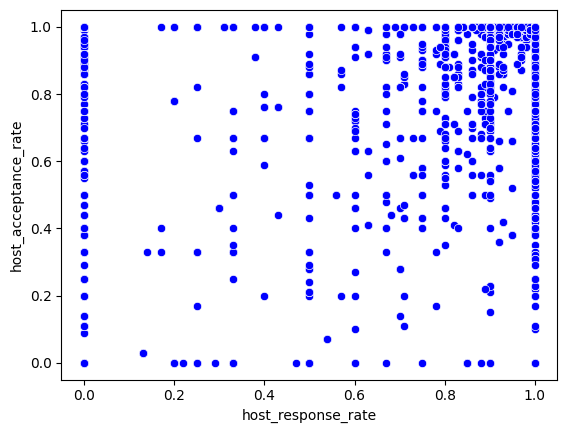

In [ ]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=dfr1)

In [ ]:
Vars_Indep1= dfr1[['host_response_rate']]
Var_Dep1= dfr1['host_acceptance_rate']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep1, y=Var_Dep1)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.14433235]),
 'rank_': 1,
 'singular_': array([36.96532306]),
 'intercept_': 0.7786676822929013}

In [ ]:
y_pred1= model.predict(X=dfr1[['host_response_rate']])
y_pred1

array([0.92300003, 0.77866768, 0.77866768, ..., 0.92300003, 0.77866768,
       0.77866768])

In [ ]:
dfr1.insert(0, 'Predicciones', y_pred1)
dfr1

,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,room_type,accommodates,bathrooms_text,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,0.923000,1.0,1.00,2,3,19.410830,-99.180570,Private room,2,1.0,...,4.900000,4.920000,4.950000,4.940000,4.870000,2,0,2,0,0.940000
16,0.778668,0.0,0.00,1,1,19.408910,-99.160830,Private room,2,1.5,...,4.200000,5.000000,4.600000,4.800000,4.600000,1,0,1,0,0.040000
17,0.778668,0.0,1.00,1,2,19.340220,-99.153060,Private room,1,1.5,...,4.600000,5.000000,4.800000,4.400000,4.400000,1,0,1,0,0.040000
18,0.778668,0.0,0.00,1,2,19.441780,-99.202020,Private room,2,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
21,0.923000,1.0,1.00,3,4,19.354160,-99.164880,Private room,2,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,3,1,2,0,1.702435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,0.778668,0.0,1.00,6,6,19.424343,-99.166729,Private room,4,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,6,1,5,0,1.702435
24213,0.778668,0.0,1.00,1,1,19.433628,-99.181902,Private room,2,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24215,0.923000,1.0,1.00,1,1,19.427807,-99.171424,Private room,2,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24218,0.778668,0.0,1.00,4,4,19.385117,-99.117693,Private room,2,1.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,2,0,2,0,1.702435


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

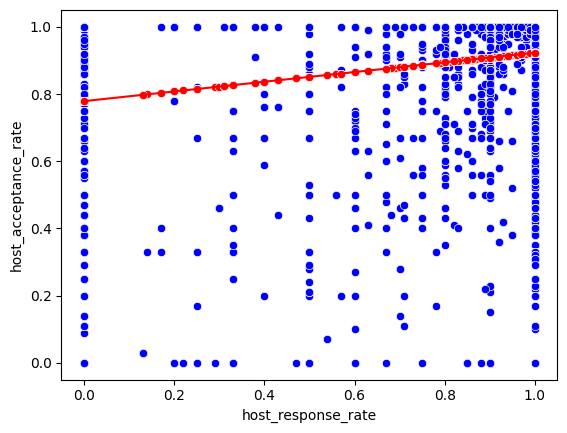

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=dfr1)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="red", data=dfr1)
sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=dfr1)

In [ ]:
cd1=model.score(X=Vars_Indep1, y=Var_Dep1)
cd1

0.05820637798618078

In [ ]:
cc1=np.sqrt(cd1)
cc1

0.24125998007581112

##**DataFrame 1 host_acceptance_rate vs price**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

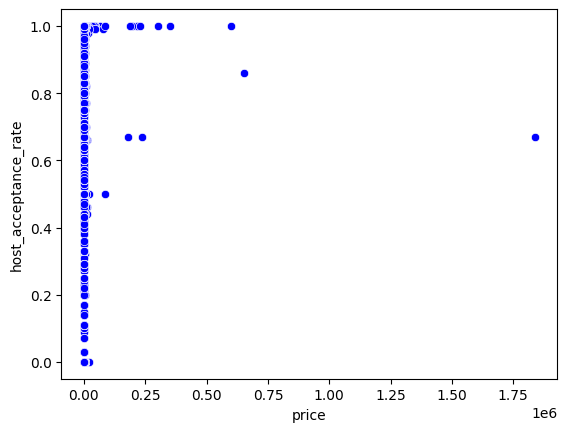

In [ ]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=dfr1)

In [ ]:
Vars_Indep2= dfr1[['price']]
Var_Dep2= dfr1['host_acceptance_rate']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.46701883e-08]),
 'rank_': 1,
 'singular_': array([2160830.41606824]),
 'intercept_': 0.8864080538332048}

In [ ]:
y_pred2= model.predict(X=dfr1[['price']])
y_pred2

array([0.8863703 , 0.88638288, 0.88639505, ..., 0.88638725, 0.88639935,
       0.88638957])

In [ ]:
dfr1.insert(0, 'Predicciones 2', y_pred2)
dfr1

,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,0.886370,0.923000,1.0,1.00,2,3,19.410830,-99.180570,Private room,2,...,4.900000,4.920000,4.950000,4.940000,4.870000,2,0,2,0,0.940000
16,0.886383,0.778668,0.0,0.00,1,1,19.408910,-99.160830,Private room,2,...,4.200000,5.000000,4.600000,4.800000,4.600000,1,0,1,0,0.040000
17,0.886395,0.778668,0.0,1.00,1,2,19.340220,-99.153060,Private room,1,...,4.600000,5.000000,4.800000,4.400000,4.400000,1,0,1,0,0.040000
18,0.886310,0.778668,0.0,0.00,1,2,19.441780,-99.202020,Private room,2,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
21,0.886365,0.923000,1.0,1.00,3,4,19.354160,-99.164880,Private room,2,...,4.746342,4.827133,4.815533,4.832627,4.708674,3,1,2,0,1.702435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,0.886364,0.778668,0.0,1.00,6,6,19.424343,-99.166729,Private room,4,...,4.746342,4.827133,4.815533,4.832627,4.708674,6,1,5,0,1.702435
24213,0.886382,0.778668,0.0,1.00,1,1,19.433628,-99.181902,Private room,2,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24215,0.886387,0.923000,1.0,1.00,1,1,19.427807,-99.171424,Private room,2,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24218,0.886399,0.778668,0.0,1.00,4,4,19.385117,-99.117693,Private room,2,...,4.746342,4.827133,4.815533,4.832627,4.708674,2,0,2,0,1.702435


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

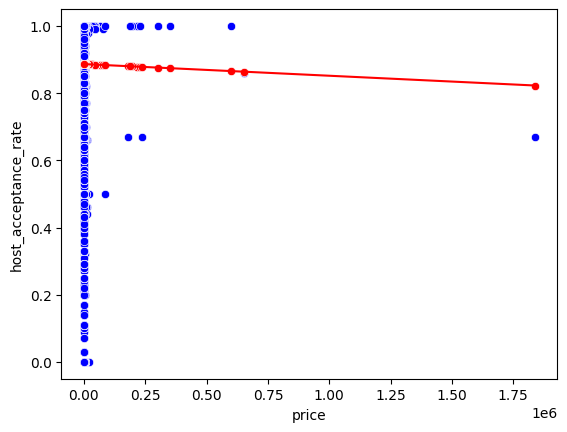

In [ ]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=dfr1)
sns.scatterplot(x='price', y='Predicciones 2', color="red", data=dfr1)
sns.lineplot(x='price', y='Predicciones 2', color="red", data=dfr1)

In [ ]:
cd2 = model.score(X=Vars_Indep2, y=Var_Dep2)
cd2

1.1476461102222224e-05

In [ ]:
cc2=np.sqrt(cd2)
cc2

0.0033876925926391585

##**DataFrame 1 host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

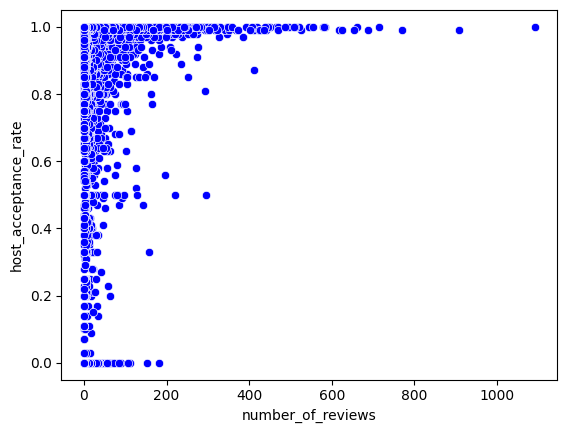

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=dfr1)

In [ ]:
Vars_Indep3= dfr1[['number_of_reviews']]
Var_Dep3= dfr1['host_acceptance_rate']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep3, y=Var_Dep3)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00051261]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 0.8730895253320402}

In [ ]:
y_pred3= model.predict(X=dfr1[['number_of_reviews']])
y_pred3

array([0.90487121, 0.87565256, 0.87565256, ..., 0.87308953, 0.87308953,
       0.87308953])

In [ ]:
dfr1.insert(0, 'Predicciones 3', y_pred3)
dfr1

,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,0.904871,0.886370,0.923000,1.0,1.00,2,3,19.410830,-99.180570,Private room,...,4.900000,4.920000,4.950000,4.940000,4.870000,2,0,2,0,0.940000
16,0.875653,0.886383,0.778668,0.0,0.00,1,1,19.408910,-99.160830,Private room,...,4.200000,5.000000,4.600000,4.800000,4.600000,1,0,1,0,0.040000
17,0.875653,0.886395,0.778668,0.0,1.00,1,2,19.340220,-99.153060,Private room,...,4.600000,5.000000,4.800000,4.400000,4.400000,1,0,1,0,0.040000
18,0.873090,0.886310,0.778668,0.0,0.00,1,2,19.441780,-99.202020,Private room,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
21,0.873090,0.886365,0.923000,1.0,1.00,3,4,19.354160,-99.164880,Private room,...,4.746342,4.827133,4.815533,4.832627,4.708674,3,1,2,0,1.702435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,0.873090,0.886364,0.778668,0.0,1.00,6,6,19.424343,-99.166729,Private room,...,4.746342,4.827133,4.815533,4.832627,4.708674,6,1,5,0,1.702435
24213,0.873090,0.886382,0.778668,0.0,1.00,1,1,19.433628,-99.181902,Private room,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24215,0.873090,0.886387,0.923000,1.0,1.00,1,1,19.427807,-99.171424,Private room,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24218,0.873090,0.886399,0.778668,0.0,1.00,4,4,19.385117,-99.117693,Private room,...,4.746342,4.827133,4.815533,4.832627,4.708674,2,0,2,0,1.702435


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

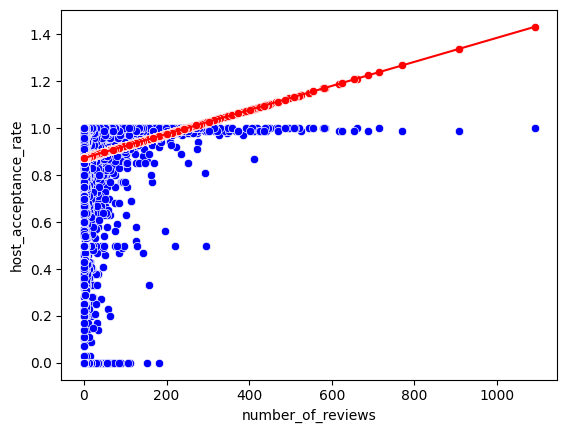

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=dfr1)
sns.scatterplot(x='number_of_reviews', y='Predicciones 3', color="red", data=dfr1)
sns.lineplot(x='number_of_reviews', y='Predicciones 3', color="red", data=dfr1)

In [ ]:
cd3 = model.score(X=Vars_Indep3, y=Var_Dep3)
cd3

0.014549307974757397

In [ ]:
cc3=np.sqrt(cd3)
cc3

0.12062051224711905

##**DataFrame 1 review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

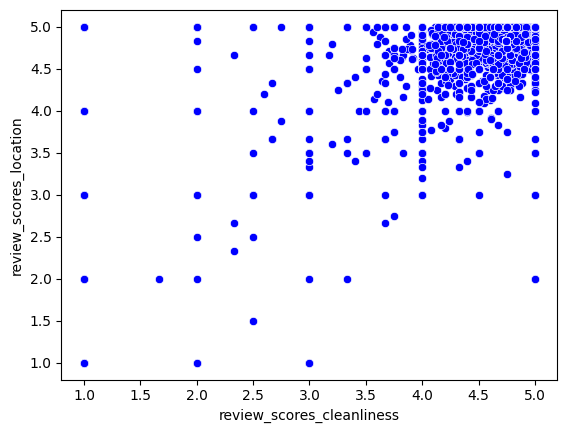

In [ ]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=dfr1)

In [ ]:
Vars_Indep4= dfr1[['review_scores_cleanliness']]
Var_Dep4= dfr1['review_scores_location']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep4, y=Var_Dep4)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.65765231]),
 'rank_': 1,
 'singular_': array([44.84721842]),
 'intercept_': 1.7125153485754563}

In [ ]:
y_pred4= model.predict(X=dfr1[['review_scores_cleanliness']])
y_pred4

array([4.93501166, 4.47465504, 4.73771597, ..., 4.83395799, 4.83395799,
       4.83395799])

In [ ]:
dfr1.insert(0, 'Predicciones 4', y_pred4)
dfr1

,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,4.935012,0.904871,0.886370,0.923000,1.0,1.00,2,3,19.410830,-99.180570,...,4.900000,4.920000,4.950000,4.940000,4.870000,2,0,2,0,0.940000
16,4.474655,0.875653,0.886383,0.778668,0.0,0.00,1,1,19.408910,-99.160830,...,4.200000,5.000000,4.600000,4.800000,4.600000,1,0,1,0,0.040000
17,4.737716,0.875653,0.886395,0.778668,0.0,1.00,1,2,19.340220,-99.153060,...,4.600000,5.000000,4.800000,4.400000,4.400000,1,0,1,0,0.040000
18,4.833958,0.873090,0.886310,0.778668,0.0,0.00,1,2,19.441780,-99.202020,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
21,4.833958,0.873090,0.886365,0.923000,1.0,1.00,3,4,19.354160,-99.164880,...,4.746342,4.827133,4.815533,4.832627,4.708674,3,1,2,0,1.702435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,4.833958,0.873090,0.886364,0.778668,0.0,1.00,6,6,19.424343,-99.166729,...,4.746342,4.827133,4.815533,4.832627,4.708674,6,1,5,0,1.702435
24213,4.833958,0.873090,0.886382,0.778668,0.0,1.00,1,1,19.433628,-99.181902,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24215,4.833958,0.873090,0.886387,0.923000,1.0,1.00,1,1,19.427807,-99.171424,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24218,4.833958,0.873090,0.886399,0.778668,0.0,1.00,4,4,19.385117,-99.117693,...,4.746342,4.827133,4.815533,4.832627,4.708674,2,0,2,0,1.702435


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

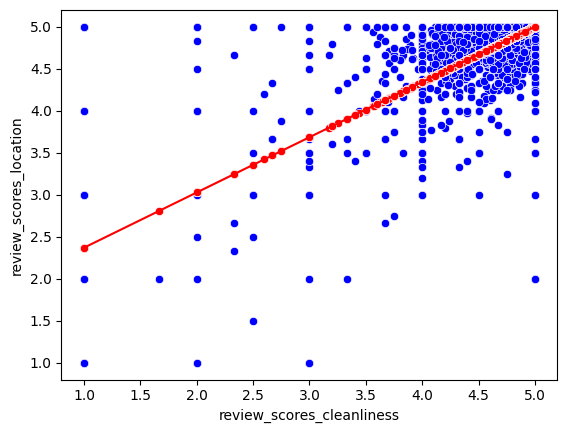

In [ ]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=dfr1)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones 4', color="red", data=dfr1)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones 4', color="red", data=dfr1)

In [ ]:
cd4 = model.score(X=Vars_Indep4, y=Var_Dep4)
cd4

0.5559776545557061

In [ ]:
cc4=np.sqrt(cd4)
cc4

0.7456390913543268

##**DataFrame 1 availability_365 vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

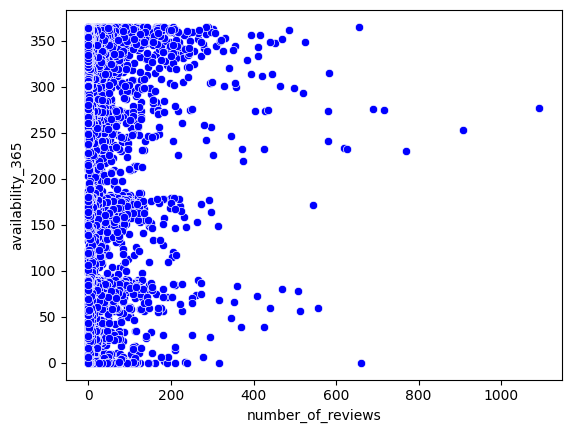

In [ ]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=dfr1)

In [ ]:
Vars_Indep5= dfr1[['number_of_reviews']]
Var_Dep5= dfr1['availability_365']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep5, y=Var_Dep5)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.09364539]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 255.47449731231168}

In [ ]:
y_pred5= model.predict(X=dfr1[['number_of_reviews']])
y_pred5

array([249.66848285, 255.00627034, 255.00627034, ..., 255.47449731,
       255.47449731, 255.47449731])

In [ ]:
dfr1.insert(0, 'Predicciones 5', y_pred5)
dfr1

,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,249.668483,4.935012,0.904871,0.886370,0.923000,1.0,1.00,2,3,19.410830,...,4.900000,4.920000,4.950000,4.940000,4.870000,2,0,2,0,0.940000
16,255.006270,4.474655,0.875653,0.886383,0.778668,0.0,0.00,1,1,19.408910,...,4.200000,5.000000,4.600000,4.800000,4.600000,1,0,1,0,0.040000
17,255.006270,4.737716,0.875653,0.886395,0.778668,0.0,1.00,1,2,19.340220,...,4.600000,5.000000,4.800000,4.400000,4.400000,1,0,1,0,0.040000
18,255.474497,4.833958,0.873090,0.886310,0.778668,0.0,0.00,1,2,19.441780,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
21,255.474497,4.833958,0.873090,0.886365,0.923000,1.0,1.00,3,4,19.354160,...,4.746342,4.827133,4.815533,4.832627,4.708674,3,1,2,0,1.702435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,255.474497,4.833958,0.873090,0.886364,0.778668,0.0,1.00,6,6,19.424343,...,4.746342,4.827133,4.815533,4.832627,4.708674,6,1,5,0,1.702435
24213,255.474497,4.833958,0.873090,0.886382,0.778668,0.0,1.00,1,1,19.433628,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24215,255.474497,4.833958,0.873090,0.886387,0.923000,1.0,1.00,1,1,19.427807,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24218,255.474497,4.833958,0.873090,0.886399,0.778668,0.0,1.00,4,4,19.385117,...,4.746342,4.827133,4.815533,4.832627,4.708674,2,0,2,0,1.702435


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

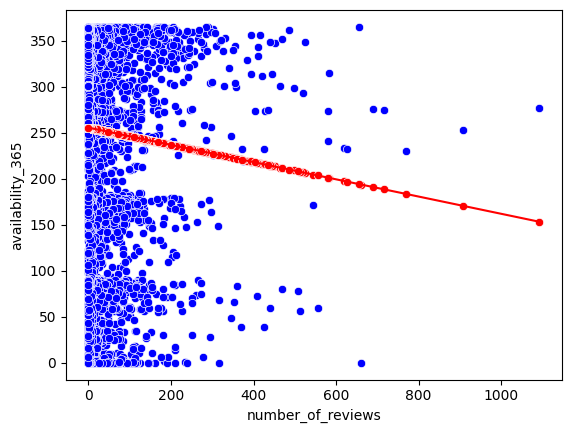

In [ ]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=dfr1)
sns.scatterplot(x='number_of_reviews', y='Predicciones 5', color="red", data=dfr1)
sns.lineplot(x='number_of_reviews', y='Predicciones 5', color="red", data=dfr1)

In [ ]:
cd5 = model.score(X=Vars_Indep5, y=Var_Dep5)
cd5

0.001848740094272383

In [ ]:
cc5=np.sqrt(cd5)
cc5

0.04299697773416619

##**DataFrame 1 reviews_per_month vs review_scores_communication**

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

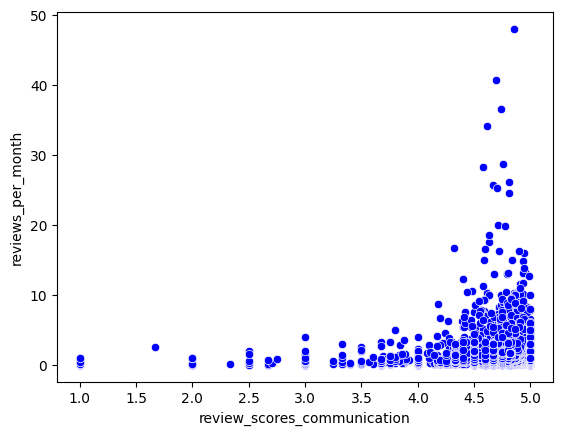

In [ ]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=dfr1)

In [ ]:
Vars_Indep6= dfr1[['review_scores_communication']]
Var_Dep6= dfr1['reviews_per_month']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep6, y=Var_Dep6)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.17731159]),
 'rank_': 1,
 'singular_': array([43.08133469]),
 'intercept_': 0.5617658349380393}

In [ ]:
y_pred6= model.predict(X=dfr1[['review_scores_communication']])
y_pred6

array([1.4394582 , 1.37739914, 1.41286146, ..., 1.41561568, 1.41561568,
       1.41561568])

In [ ]:
dfr1.insert(0, 'Predicciones 6', y_pred6)
dfr1

,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,1.439458,249.668483,4.935012,0.904871,0.886370,0.923000,1.0,1.00,2,3,...,4.900000,4.920000,4.950000,4.940000,4.870000,2,0,2,0,0.940000
16,1.377399,255.006270,4.474655,0.875653,0.886383,0.778668,0.0,0.00,1,1,...,4.200000,5.000000,4.600000,4.800000,4.600000,1,0,1,0,0.040000
17,1.412861,255.006270,4.737716,0.875653,0.886395,0.778668,0.0,1.00,1,2,...,4.600000,5.000000,4.800000,4.400000,4.400000,1,0,1,0,0.040000
18,1.415616,255.474497,4.833958,0.873090,0.886310,0.778668,0.0,0.00,1,2,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
21,1.415616,255.474497,4.833958,0.873090,0.886365,0.923000,1.0,1.00,3,4,...,4.746342,4.827133,4.815533,4.832627,4.708674,3,1,2,0,1.702435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,1.415616,255.474497,4.833958,0.873090,0.886364,0.778668,0.0,1.00,6,6,...,4.746342,4.827133,4.815533,4.832627,4.708674,6,1,5,0,1.702435
24213,1.415616,255.474497,4.833958,0.873090,0.886382,0.778668,0.0,1.00,1,1,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24215,1.415616,255.474497,4.833958,0.873090,0.886387,0.923000,1.0,1.00,1,1,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,1,0,1.702435
24218,1.415616,255.474497,4.833958,0.873090,0.886399,0.778668,0.0,1.00,4,4,...,4.746342,4.827133,4.815533,4.832627,4.708674,2,0,2,0,1.702435


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

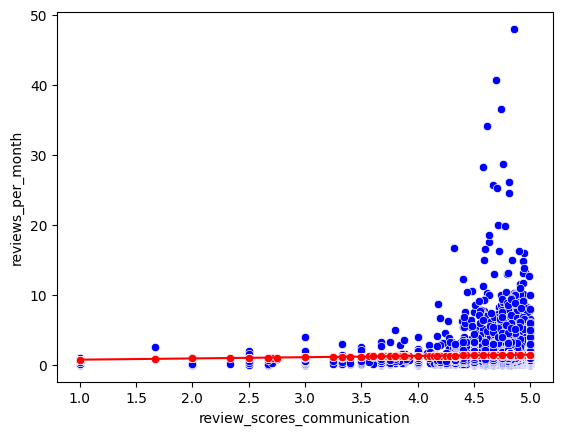

In [ ]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=dfr1)
sns.scatterplot(x='review_scores_communication', y='Predicciones 6', color="red", data=dfr1)
sns.lineplot(x='review_scores_communication', y='Predicciones 6', color="red", data=dfr1)

In [ ]:
cd6 = model.score(X=Vars_Indep6, y=Var_Dep6)
cd6

0.001980652599177568

In [ ]:
cc6=np.sqrt(cd6)
cc6

0.04450452335636871

##**DataFrame 2 host_acceptance_rate vs host_response_rate**

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

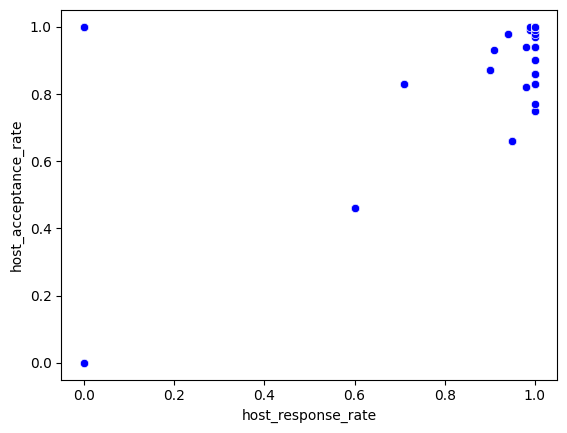

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=dfr2)

In [ ]:
Vars_Indep7= dfr2[['host_response_rate']]
Var_Dep7= dfr2['host_acceptance_rate']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep7, y=Var_Dep7)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.21004318]),
 'rank_': 1,
 'singular_': array([3.090885]),
 'intercept_': 0.7265408932341243}

In [ ]:
y_pred7= model.predict(X=dfr2[['host_response_rate']])
y_pred7

array([0.91557975, 0.91557975, 0.91557975, 0.91557975, 0.93658407,
       0.93658407, 0.93658407, 0.93658407, 0.93448364, 0.92608191,
       0.93238321, 0.92608191, 0.92608191, 0.93658407, 0.93658407,
       0.93658407, 0.93658407, 0.93658407, 0.87567155, 0.91768018,
       0.92608191, 0.72654089, 0.93658407, 0.72654089, 0.93658407,
       0.93658407, 0.93658407, 0.93658407, 0.93658407, 0.93658407,
       0.93658407, 0.93658407, 0.93658407, 0.93658407, 0.93658407,
       0.93658407, 0.87567155, 0.93658407, 0.93658407, 0.93238321,
       0.93238321, 0.93448364, 0.93658407, 0.93658407, 0.93658407,
       0.93658407, 0.93658407, 0.93658407, 0.93658407, 0.93658407,
       0.93658407, 0.93658407, 0.93658407, 0.93658407, 0.93658407,
       0.93658407, 0.93658407, 0.93658407, 0.93658407, 0.93658407,
       0.93658407, 0.93658407, 0.93658407, 0.93658407, 0.93658407,
       0.93658407, 0.93658407, 0.93658407, 0.93658407, 0.93658407,
       0.93658407, 0.93658407, 0.93658407, 0.93658407, 0.93658

In [ ]:
dfr2.insert(0, 'Predicciones', y_pred7)
dfr2

,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,room_type,accommodates,bathrooms_text,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14,0.915580,0.9,0.87,19,21,19.43059,-99.17073,Hotel room,2,1.0,...,4.830000,5.000000,5.000000,4.830000,4.780000,11,7,0,0,0.180000
53,0.915580,0.9,0.87,19,21,19.43078,-99.17011,Hotel room,2,1.0,...,4.940000,5.000000,5.000000,4.970000,4.970000,11,7,0,0,0.250000
55,0.915580,0.9,0.87,19,21,19.43068,-99.17007,Hotel room,2,1.0,...,4.920000,5.000000,5.000000,5.000000,4.900000,11,7,0,0,0.460000
62,0.915580,0.9,0.87,19,21,19.43052,-99.17003,Hotel room,2,1.0,...,4.950000,5.000000,5.000000,4.950000,4.950000,11,7,0,0,0.250000
66,0.936584,1.0,0.86,16,16,19.41108,-99.17634,Hotel room,3,1.0,...,5.000000,5.000000,5.000000,5.000000,4.860000,12,3,2,0,0.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,0.936584,1.0,1.00,5,6,19.43142,-99.15688,Hotel room,0,0.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,2,0,1,0,0.120000
9537,0.726541,0.0,1.00,1,3,19.42918,-99.19296,Hotel room,0,0.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9539,0.726541,0.0,1.00,3,3,19.35086,-99.18667,Hotel room,0,0.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9544,0.726541,0.0,1.00,4,4,19.43632,-99.14640,Hotel room,0,0.0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

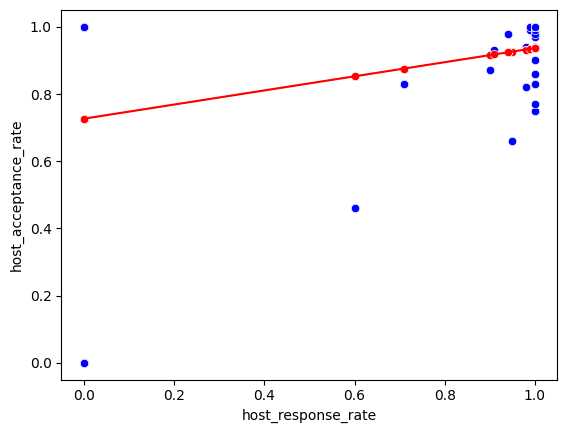

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=dfr2)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="red", data=dfr2)
sns.lineplot(x='host_response_rate', y='Predicciones', color="red", data=dfr2)

In [ ]:
cd7 = model.score(X=Vars_Indep7, y=Var_Dep7)
cd7

0.11680869900723445

In [ ]:
cc7=np.sqrt(cd7)
cc7

0.3417728763480719

##**DataFrame 2 host_acceptance_rate vs price**

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

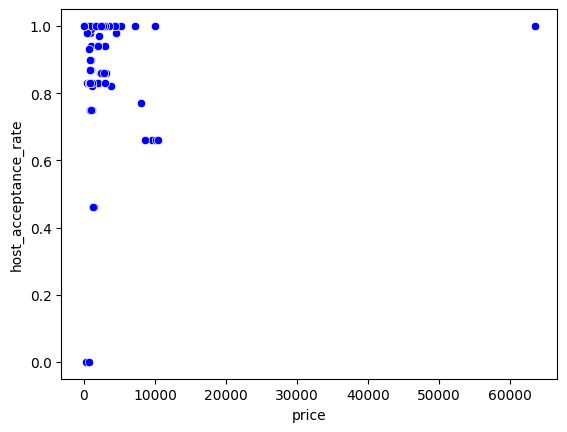

In [ ]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=dfr2)

In [ ]:
Vars_Indep8= dfr2[['price']]
Var_Dep8= dfr2['host_acceptance_rate']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep8, y=Var_Dep8)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-5.7193937e-08]),
 'rank_': 1,
 'singular_': array([65531.08068275]),
 'intercept_': 0.9146286491794503}

In [ ]:
y_pred8= model.predict(X=dfr2[['price']])
y_pred8

array([0.91457111, 0.91457111, 0.91457672, 0.91457672, 0.9144478 ,
       0.91446805, 0.91446279, 0.9145257 , 0.91457672, 0.91407947,
       0.91457403, 0.91404956, 0.91413552, 0.9144971 , 0.91449138,
       0.91449138, 0.91436699, 0.91460268, 0.91451432, 0.91458581,
       0.9140316 , 0.91099455, 0.91454286, 0.91405671, 0.91454578,
       0.91451483, 0.91451483, 0.91451483, 0.91451483, 0.91451483,
       0.91450854, 0.91458575, 0.91457883, 0.91458507, 0.91457146,
       0.91458387, 0.91451432, 0.91451998, 0.91451998, 0.91456185,
       0.91441148, 0.91454354, 0.9146052 , 0.91460291, 0.91457637,
       0.91459147, 0.91457637, 0.91456002, 0.91458941, 0.91457757,
       0.91459147, 0.91457757, 0.91457757, 0.9145949 , 0.91458084,
       0.91457757, 0.91456551, 0.9145146 , 0.91456059, 0.91446748,
       0.91447257, 0.91460966, 0.91461121, 0.91461549, 0.91461201,
       0.91461201, 0.91461201, 0.91460966, 0.91457775, 0.91460852,
       0.91456002, 0.91457832, 0.91458347, 0.91421331, 0.91457

In [ ]:
dfr2.insert(0, 'Predicciones 2', y_pred8)
dfr2

,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14,0.914571,0.915580,0.9,0.87,19,21,19.43059,-99.17073,Hotel room,2,...,4.830000,5.000000,5.000000,4.830000,4.780000,11,7,0,0,0.180000
53,0.914571,0.915580,0.9,0.87,19,21,19.43078,-99.17011,Hotel room,2,...,4.940000,5.000000,5.000000,4.970000,4.970000,11,7,0,0,0.250000
55,0.914577,0.915580,0.9,0.87,19,21,19.43068,-99.17007,Hotel room,2,...,4.920000,5.000000,5.000000,5.000000,4.900000,11,7,0,0,0.460000
62,0.914577,0.915580,0.9,0.87,19,21,19.43052,-99.17003,Hotel room,2,...,4.950000,5.000000,5.000000,4.950000,4.950000,11,7,0,0,0.250000
66,0.914448,0.936584,1.0,0.86,16,16,19.41108,-99.17634,Hotel room,3,...,5.000000,5.000000,5.000000,5.000000,4.860000,12,3,2,0,0.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,0.914629,0.936584,1.0,1.00,5,6,19.43142,-99.15688,Hotel room,0,...,5.000000,5.000000,5.000000,5.000000,5.000000,2,0,1,0,0.120000
9537,0.914629,0.726541,0.0,1.00,1,3,19.42918,-99.19296,Hotel room,0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9539,0.914629,0.726541,0.0,1.00,3,3,19.35086,-99.18667,Hotel room,0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9544,0.914629,0.726541,0.0,1.00,4,4,19.43632,-99.14640,Hotel room,0,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

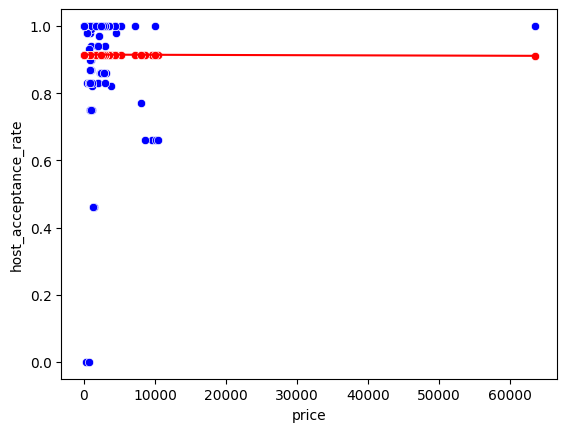

In [ ]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=dfr2)
sns.scatterplot(x='price', y='Predicciones 2', color="red", data=dfr2)
sns.lineplot(x='price', y='Predicciones 2', color="red", data=dfr2)

In [ ]:
cd8 = model.score(X=Vars_Indep8, y=Var_Dep8)
cd8

3.893023132972573e-06

In [ ]:
cc8=np.sqrt(cd8)
cc8

0.0019730745381187635

##**DataFrame 2 host_acceptance_rate vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

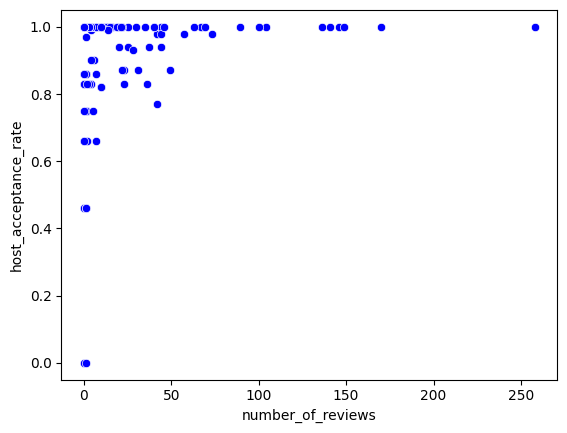

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=dfr2)

In [ ]:
Vars_Indep9= dfr2[['number_of_reviews']]
Var_Dep9= dfr2['host_acceptance_rate']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep9, y=Var_Dep9)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00084206]),
 'rank_': 1,
 'singular_': array([447.19940417]),
 'intercept_': 0.89633416813697}

In [ ]:
y_pred9= model.predict(X=dfr2[['number_of_reviews']])
y_pred9

array([0.91570155, 0.92243803, 0.93759511, 0.91485949, 0.90222859,
       0.89717623, 0.91738567, 0.93338481, 0.89970241, 0.90222859,
       0.92749039, 0.89633417, 0.89801829, 0.90307065, 0.89886035,
       0.89717623, 0.93170069, 0.98390842, 0.91570155, 0.91991185,
       0.89633417, 0.90559683, 1.01085435, 0.89717623, 0.97127752,
       0.90391271, 0.90728095, 0.90643889, 0.90980713, 0.90812301,
       0.89717623, 0.90728095, 1.03948439, 1.11358568, 0.93338481,
       0.93338481, 0.89970241, 0.89633417, 0.89633417, 0.90475477,
       0.90475477, 1.01506465, 1.01927495, 0.92664833, 0.90054447,
       0.89717623, 0.90307065, 0.90138653, 0.90222859, 0.89970241,
       0.89886035, 0.90475477, 0.89717623, 0.89801829, 0.89886035,
       0.90896507, 1.02180113, 0.89886035, 0.89717623, 0.90222859,
       0.91738567, 0.90222859, 0.9527522 , 0.92580627, 0.91485949,
       0.95443632, 0.94938396, 0.93506893, 0.89801829, 0.98054018,
       0.89633417, 0.89717623, 0.90054447, 0.89633417, 0.90812

In [ ]:
dfr2.insert(0, 'Predicciones 3', y_pred9)
dfr2

,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14,0.915702,0.914571,0.915580,0.9,0.87,19,21,19.43059,-99.17073,Hotel room,...,4.830000,5.000000,5.000000,4.830000,4.780000,11,7,0,0,0.180000
53,0.922438,0.914571,0.915580,0.9,0.87,19,21,19.43078,-99.17011,Hotel room,...,4.940000,5.000000,5.000000,4.970000,4.970000,11,7,0,0,0.250000
55,0.937595,0.914577,0.915580,0.9,0.87,19,21,19.43068,-99.17007,Hotel room,...,4.920000,5.000000,5.000000,5.000000,4.900000,11,7,0,0,0.460000
62,0.914859,0.914577,0.915580,0.9,0.87,19,21,19.43052,-99.17003,Hotel room,...,4.950000,5.000000,5.000000,4.950000,4.950000,11,7,0,0,0.250000
66,0.902229,0.914448,0.936584,1.0,0.86,16,16,19.41108,-99.17634,Hotel room,...,5.000000,5.000000,5.000000,5.000000,4.860000,12,3,2,0,0.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,0.898860,0.914629,0.936584,1.0,1.00,5,6,19.43142,-99.15688,Hotel room,...,5.000000,5.000000,5.000000,5.000000,5.000000,2,0,1,0,0.120000
9537,0.896334,0.914629,0.726541,0.0,1.00,1,3,19.42918,-99.19296,Hotel room,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9539,0.896334,0.914629,0.726541,0.0,1.00,3,3,19.35086,-99.18667,Hotel room,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9544,0.896334,0.914629,0.726541,0.0,1.00,4,4,19.43632,-99.14640,Hotel room,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

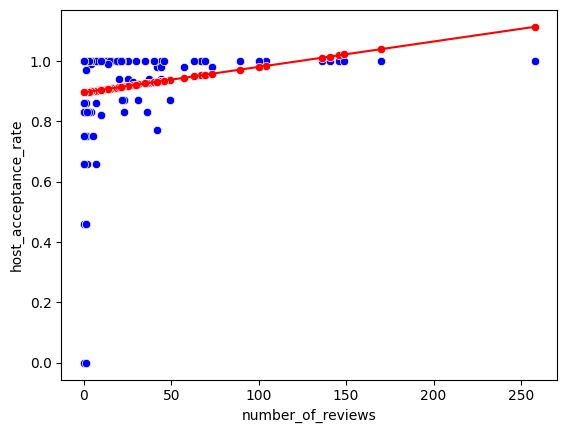

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=dfr2)
sns.scatterplot(x='number_of_reviews', y='Predicciones 3', color="red", data=dfr2)
sns.lineplot(x='number_of_reviews', y='Predicciones 3', color="red", data=dfr2)

In [ ]:
cd9 = model.score(X=Vars_Indep9, y=Var_Dep9)
cd9

0.03929895343513068

In [ ]:
cc9=np.sqrt(cd9)
cc9

0.198239636387708

##**DataFrame 2 review_scores_location vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

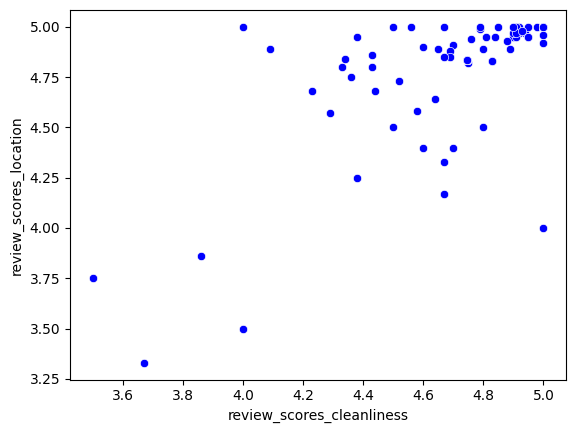

In [ ]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=dfr2)

In [ ]:
Vars_Indep10= dfr2[['review_scores_cleanliness']]
Var_Dep10= dfr2['review_scores_location']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.71925464]),
 'rank_': 1,
 'singular_': array([3.16766815]),
 'intercept_': 1.4083335717398806}

In [ ]:
y_pred10= model.predict(X=dfr2[['review_scores_cleanliness']])
y_pred10

array([4.88233348, 4.96145149, 4.9470664 , 4.96864404, 5.00460677,
       5.00460677, 5.00460677, 4.96864404, 5.00460677, 4.18465648,
       4.9470664 , 4.82216194, 5.00460677, 5.00460677, 5.00460677,
       5.00460677, 4.9326813 , 4.93987385, 4.78883038, 4.82479311,
       4.82216194, 4.93987385, 4.85356329, 5.00460677, 4.83198565,
       4.92548876, 5.00460677, 4.70251982, 4.78163783, 4.85356329,
       5.00460677, 4.78163783, 4.86794839, 4.9326813 , 4.86075584,
       4.88952603, 3.92572481, 4.82216194, 4.82216194, 5.00460677,
       4.86075584, 4.99022167, 4.91829621, 4.68813473, 4.71690491,
       4.28535213, 4.55866889, 4.76725274, 4.59463162, 4.28535213,
       4.0479981 , 4.78883038, 5.00460677, 5.00460677, 5.00460677,
       4.52270616, 4.93987385, 5.00460677, 5.00460677, 5.00460677,
       5.00460677, 4.49393597, 4.52989871, 4.35008505, 4.4507807 ,
       4.5442838 , 4.60182417, 4.76725274, 5.00460677, 4.59463162,
       4.82216194, 5.00460677, 5.00460677, 4.82216194, 4.74567

In [ ]:
dfr2.insert(0, 'Predicciones 4', y_pred10)
dfr2

,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14,4.882333,0.915702,0.914571,0.915580,0.9,0.87,19,21,19.43059,-99.17073,...,4.830000,5.000000,5.000000,4.830000,4.780000,11,7,0,0,0.180000
53,4.961451,0.922438,0.914571,0.915580,0.9,0.87,19,21,19.43078,-99.17011,...,4.940000,5.000000,5.000000,4.970000,4.970000,11,7,0,0,0.250000
55,4.947066,0.937595,0.914577,0.915580,0.9,0.87,19,21,19.43068,-99.17007,...,4.920000,5.000000,5.000000,5.000000,4.900000,11,7,0,0,0.460000
62,4.968644,0.914859,0.914577,0.915580,0.9,0.87,19,21,19.43052,-99.17003,...,4.950000,5.000000,5.000000,4.950000,4.950000,11,7,0,0,0.250000
66,5.004607,0.902229,0.914448,0.936584,1.0,0.86,16,16,19.41108,-99.17634,...,5.000000,5.000000,5.000000,5.000000,4.860000,12,3,2,0,0.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,5.004607,0.898860,0.914629,0.936584,1.0,1.00,5,6,19.43142,-99.15688,...,5.000000,5.000000,5.000000,5.000000,5.000000,2,0,1,0,0.120000
9537,4.822162,0.896334,0.914629,0.726541,0.0,1.00,1,3,19.42918,-99.19296,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9539,4.822162,0.896334,0.914629,0.726541,0.0,1.00,3,3,19.35086,-99.18667,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9544,4.822162,0.896334,0.914629,0.726541,0.0,1.00,4,4,19.43632,-99.14640,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

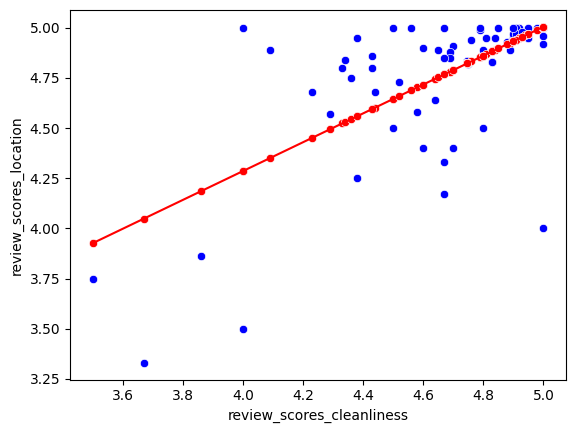

In [ ]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=dfr2)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones 4', color="red", data=dfr2)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones 4', color="red", data=dfr2)

In [ ]:
cd10 = model.score(X=Vars_Indep10, y=Var_Dep10)
cd10

0.5006028660963298

In [ ]:
cc10=np.sqrt(cd10)
cc10

0.707532943470712

##**DataFrame 2 availability_365 vs number_of_reviews**

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

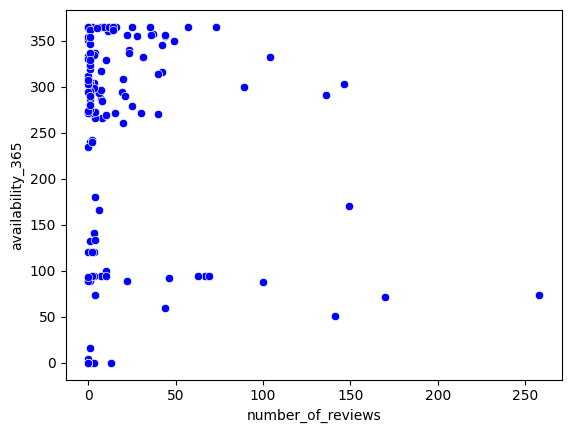

In [ ]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=dfr2)

In [ ]:
Vars_Indep11= dfr2[['number_of_reviews']]
Var_Dep11= dfr2['availability_365']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep11, y=Var_Dep11)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.35915992]),
 'rank_': 1,
 'singular_': array([447.19940417]),
 'intercept_': 254.19984142300686}

In [ ]:
y_pred11= model.predict(X=dfr2[['number_of_reviews']])
y_pred11

array([245.93916327, 243.06588391, 236.60100535, 246.29832318,
       251.68572198, 253.8406815 , 245.22084343, 238.39680495,
       252.76320174, 251.68572198, 240.91092439, 254.19984142,
       253.48152158, 251.32656206, 253.12236166, 253.8406815 ,
       239.11512479, 216.84720975, 245.93916327, 244.14336367,
       254.19984142, 250.2490823 , 205.35409231, 253.8406815 ,
       222.23460855, 250.96740214, 249.53076246, 249.88992238,
       248.4532827 , 249.17160254, 253.8406815 , 249.53076246,
       193.14265504, 161.53658209, 238.39680495, 238.39680495,
       252.76320174, 254.19984142, 254.19984142, 250.60824222,
       250.60824222, 203.55829272, 201.76249312, 241.27008431,
       252.40404182, 253.8406815 , 251.32656206, 252.0448819 ,
       251.68572198, 252.76320174, 253.12236166, 250.60824222,
       253.8406815 , 253.48152158, 253.12236166, 248.81244262,
       200.68501336, 253.12236166, 253.8406815 , 251.68572198,
       245.22084343, 251.68572198, 230.13612679, 241.62

In [ ]:
dfr2.insert(0, 'Predicciones 5', y_pred11)
dfr2

,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14,245.939163,4.882333,0.915702,0.914571,0.915580,0.9,0.87,19,21,19.43059,...,4.830000,5.000000,5.000000,4.830000,4.780000,11,7,0,0,0.180000
53,243.065884,4.961451,0.922438,0.914571,0.915580,0.9,0.87,19,21,19.43078,...,4.940000,5.000000,5.000000,4.970000,4.970000,11,7,0,0,0.250000
55,236.601005,4.947066,0.937595,0.914577,0.915580,0.9,0.87,19,21,19.43068,...,4.920000,5.000000,5.000000,5.000000,4.900000,11,7,0,0,0.460000
62,246.298323,4.968644,0.914859,0.914577,0.915580,0.9,0.87,19,21,19.43052,...,4.950000,5.000000,5.000000,4.950000,4.950000,11,7,0,0,0.250000
66,251.685722,5.004607,0.902229,0.914448,0.936584,1.0,0.86,16,16,19.41108,...,5.000000,5.000000,5.000000,5.000000,4.860000,12,3,2,0,0.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,253.122362,5.004607,0.898860,0.914629,0.936584,1.0,1.00,5,6,19.43142,...,5.000000,5.000000,5.000000,5.000000,5.000000,2,0,1,0,0.120000
9537,254.199841,4.822162,0.896334,0.914629,0.726541,0.0,1.00,1,3,19.42918,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9539,254.199841,4.822162,0.896334,0.914629,0.726541,0.0,1.00,3,3,19.35086,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9544,254.199841,4.822162,0.896334,0.914629,0.726541,0.0,1.00,4,4,19.43632,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

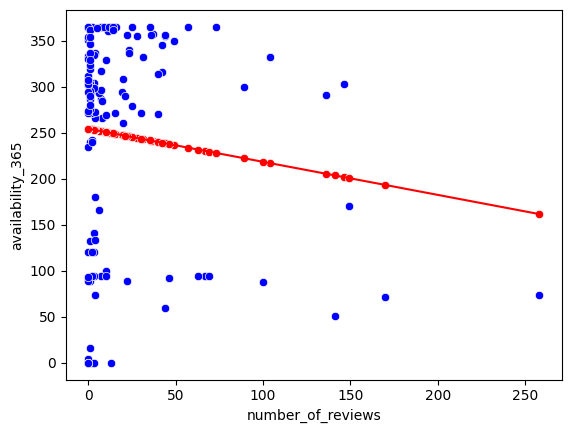

In [ ]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=dfr2)
sns.scatterplot(x='number_of_reviews', y='Predicciones 5', color="red", data=dfr2)
sns.lineplot(x='number_of_reviews', y='Predicciones 5', color="red", data=dfr2)

In [ ]:
cd11 = model.score(X=Vars_Indep11, y=Var_Dep11)
cd11

0.014844412000572182

In [ ]:
cc11=np.sqrt(cd11)
cc11

0.12183764607284639

##**DataFrame 2 reviews_per_month vs review_scores_communication**

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

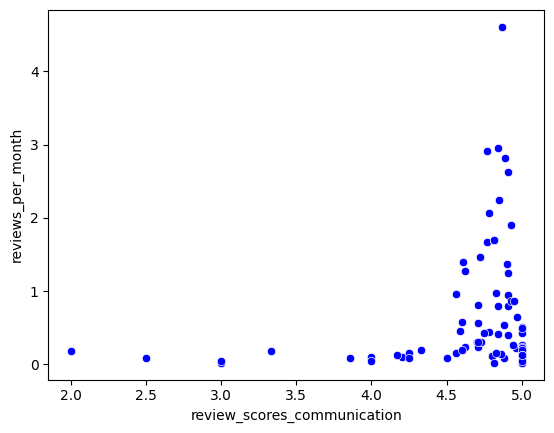

In [ ]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=dfr2)

In [ ]:
Vars_Indep12= dfr2[['review_scores_communication']]
Var_Dep12= dfr2['reviews_per_month']

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X=Vars_Indep12, y=Var_Dep12)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.22620477]),
 'rank_': 1,
 'singular_': array([5.25155421]),
 'intercept_': -0.3282295699653952}

In [ ]:
y_pred12= model.predict(X=dfr2[['review_scores_communication']])
y_pred12

array([0.80279426, 0.80279426, 0.80279426, 0.80279426, 0.80279426,
       0.35038473, 0.79374607, 0.78243583, 0.80279426, 0.54492082,
       0.75302921, 0.761067  , 0.80279426, 0.77564968, 0.80279426,
       0.80279426, 0.77564968, 0.78695992, 0.73493283, 0.73719487,
       0.761067  , 0.80279426, 0.76886354, 0.80279426, 0.73945692,
       0.70326416, 0.80279426, 0.65123706, 0.78922197, 0.73719487,
       0.12417996, 0.71683645, 0.76660149, 0.77338764, 0.76660149,
       0.78243583, 0.23728234, 0.761067  , 0.761067  , 0.80279426,
       0.71231235, 0.78243583, 0.77791173, 0.70326416, 0.62183044,
       0.80279426, 0.63314068, 0.6150443 , 0.80279426, 0.57658949,
       0.4250323 , 0.71231235, 0.80279426, 0.35038473, 0.80279426,
       0.74171897, 0.75076716, 0.80279426, 0.80279426, 0.80279426,
       0.80279426, 0.77112559, 0.78017378, 0.73719487, 0.7100503 ,
       0.7145744 , 0.71683645, 0.78243583, 0.80279426, 0.75302921,
       0.761067  , 0.80279426, 0.7575533 , 0.761067  , 0.73719

In [ ]:
dfr2.insert(0, 'Predicciones 6', y_pred12)
dfr2

,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14,0.802794,245.939163,4.882333,0.915702,0.914571,0.915580,0.9,0.87,19,21,...,4.830000,5.000000,5.000000,4.830000,4.780000,11,7,0,0,0.180000
53,0.802794,243.065884,4.961451,0.922438,0.914571,0.915580,0.9,0.87,19,21,...,4.940000,5.000000,5.000000,4.970000,4.970000,11,7,0,0,0.250000
55,0.802794,236.601005,4.947066,0.937595,0.914577,0.915580,0.9,0.87,19,21,...,4.920000,5.000000,5.000000,5.000000,4.900000,11,7,0,0,0.460000
62,0.802794,246.298323,4.968644,0.914859,0.914577,0.915580,0.9,0.87,19,21,...,4.950000,5.000000,5.000000,4.950000,4.950000,11,7,0,0,0.250000
66,0.802794,251.685722,5.004607,0.902229,0.914448,0.936584,1.0,0.86,16,16,...,5.000000,5.000000,5.000000,5.000000,4.860000,12,3,2,0,0.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,0.802794,253.122362,5.004607,0.898860,0.914629,0.936584,1.0,1.00,5,6,...,5.000000,5.000000,5.000000,5.000000,5.000000,2,0,1,0,0.120000
9537,0.761067,254.199841,4.822162,0.896334,0.914629,0.726541,0.0,1.00,1,3,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9539,0.761067,254.199841,4.822162,0.896334,0.914629,0.726541,0.0,1.00,3,3,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435
9544,0.761067,254.199841,4.822162,0.896334,0.914629,0.726541,0.0,1.00,4,4,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,0,0,0,1.702435


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

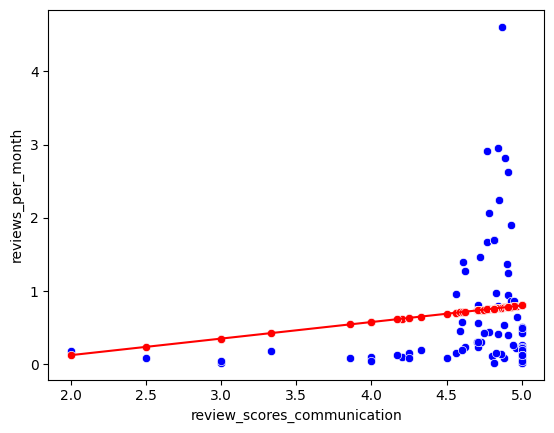

In [ ]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=dfr2)
sns.scatterplot(x='review_scores_communication', y='Predicciones 6', color="red", data=dfr2)
sns.lineplot(x='review_scores_communication', y='Predicciones 6', color="red", data=dfr2)

In [ ]:
cd12 = model.score(X=Vars_Indep12, y=Var_Dep12)
cd12

0.01551864799845526

In [ ]:
cc12=np.sqrt(cd12)
cc12

0.12457386563182207

Como pudimos observar en los modelos anteriores, la correlacion de muchos de los modelos es muy baja, podemos observar que solo 2 variables tienen mas de 0.50 de correlacion entre ellas, que justamente son las variables que mas correlacion tienen con 0.74 en el dataframe de Private Room y 0.70 en el dataframe de Hotel Room, y esta es la de review_scores_locations como variable dependiente y review_scores_cleanliness como variable independiente, lo cual nos indica que los puntajes de review de las ubicaciones van de la mano con la limpieza de los scores. Sin embargo, todas las otras variables tienen muy poca correlacion, siendo 0.34 en Hotel Room y 0.24 en Private Room, las otras variables que mas relacion entre si tienen, siendo host_acceptance_rate la variable dependiente y host_response_rate la independiente; sin embargo vemos que no tienen mucha correlacion. Las otras correlaciones van desde 0.003 hasta 0.19, por lo que vemos que no son significativas y no hay correlacion entre las otras variables.

##**Tabla de coeficientes**

In [ ]:
#Tipo de habitacion 1
Corr_Factors1 = dfr1.corr()
Corr_Factors1

<ipython-input-197-08e52a0fa71e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors1 = dfr1.corr()


,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones 6,1.000000,-0.061787,0.766365,0.061787,0.070416,0.100710,0.100710,0.010092,-0.018968,-0.008013,...,0.766365,0.891011,1.000000,0.770057,0.815283,-0.045057,-0.052094,-0.016627,0.005011,0.044505
Predicciones 5,-0.061787,1.000000,-0.069409,-1.000000,0.004361,-0.171440,-0.171440,-0.120621,0.012316,0.010298,...,-0.069409,-0.070298,-0.061787,-0.061248,-0.080534,0.000005,0.007335,-0.024676,0.031729,-0.647719
Predicciones 4,0.766365,-0.069409,1.000000,0.069409,0.063963,0.102861,0.102861,0.023957,-0.007011,-0.001759,...,1.000000,0.764223,0.766365,0.745639,0.851904,-0.021427,-0.009000,-0.024584,-0.010718,0.065338
Predicciones 3,0.061787,-1.000000,0.069409,1.000000,-0.004361,0.171440,0.171440,0.120621,-0.012316,-0.010298,...,0.069409,0.070298,0.061787,0.061248,0.080534,-0.000005,-0.007335,0.024676,-0.031729,0.647719
Predicciones 2,0.070416,0.004361,0.063963,-0.004361,1.000000,0.015258,0.015258,0.003388,-0.003591,-0.001860,...,0.063963,0.032216,0.070416,0.035615,0.046364,-0.006038,-0.015131,0.008458,0.003877,-0.002863
Predicciones,0.100710,-0.171440,0.102861,0.171440,0.015258,1.000000,1.000000,0.241260,0.075452,0.037381,...,0.102861,0.104158,0.100710,0.111599,0.098512,0.185496,0.085561,0.229203,0.034296,0.126924
host_response_rate,0.100710,-0.171440,0.102861,0.171440,0.015258,1.000000,1.000000,0.241260,0.075452,0.037381,...,0.102861,0.104158,0.100710,0.111599,0.098512,0.185496,0.085561,0.229203,0.034296,0.126924
host_acceptance_rate,0.010092,-0.120621,0.023957,0.120621,0.003388,0.241260,0.241260,1.000000,0.045411,0.023492,...,0.023957,0.012768,0.010092,0.009970,0.006898,0.113421,0.061304,0.153447,-0.038952,0.132598
host_listings_count,-0.018968,0.012316,-0.007011,-0.012316,-0.003591,0.075452,0.075452,0.045411,1.000000,0.966838,...,-0.007011,-0.013160,-0.018968,0.000007,-0.025091,0.342389,0.307156,0.195827,0.100306,0.019277
host_total_listings_count,-0.008013,0.010298,-0.001759,-0.010298,-0.001860,0.037381,0.037381,0.023492,0.966838,1.000000,...,-0.001759,-0.005156,-0.008013,0.001152,-0.010324,0.137421,0.132403,0.068664,0.032993,0.008407


In [ ]:
#Valor absoluto de las correlaciones
Corr_Factors1f= abs(Corr_Factors1)
Corr_Factors1f

,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones 6,1.000000,0.061787,0.766365,0.061787,0.070416,0.100710,0.100710,0.010092,0.018968,0.008013,...,0.766365,0.891011,1.000000,0.770057,0.815283,0.045057,0.052094,0.016627,0.005011,0.044505
Predicciones 5,0.061787,1.000000,0.069409,1.000000,0.004361,0.171440,0.171440,0.120621,0.012316,0.010298,...,0.069409,0.070298,0.061787,0.061248,0.080534,0.000005,0.007335,0.024676,0.031729,0.647719
Predicciones 4,0.766365,0.069409,1.000000,0.069409,0.063963,0.102861,0.102861,0.023957,0.007011,0.001759,...,1.000000,0.764223,0.766365,0.745639,0.851904,0.021427,0.009000,0.024584,0.010718,0.065338
Predicciones 3,0.061787,1.000000,0.069409,1.000000,0.004361,0.171440,0.171440,0.120621,0.012316,0.010298,...,0.069409,0.070298,0.061787,0.061248,0.080534,0.000005,0.007335,0.024676,0.031729,0.647719
Predicciones 2,0.070416,0.004361,0.063963,0.004361,1.000000,0.015258,0.015258,0.003388,0.003591,0.001860,...,0.063963,0.032216,0.070416,0.035615,0.046364,0.006038,0.015131,0.008458,0.003877,0.002863
Predicciones,0.100710,0.171440,0.102861,0.171440,0.015258,1.000000,1.000000,0.241260,0.075452,0.037381,...,0.102861,0.104158,0.100710,0.111599,0.098512,0.185496,0.085561,0.229203,0.034296,0.126924
host_response_rate,0.100710,0.171440,0.102861,0.171440,0.015258,1.000000,1.000000,0.241260,0.075452,0.037381,...,0.102861,0.104158,0.100710,0.111599,0.098512,0.185496,0.085561,0.229203,0.034296,0.126924
host_acceptance_rate,0.010092,0.120621,0.023957,0.120621,0.003388,0.241260,0.241260,1.000000,0.045411,0.023492,...,0.023957,0.012768,0.010092,0.009970,0.006898,0.113421,0.061304,0.153447,0.038952,0.132598
host_listings_count,0.018968,0.012316,0.007011,0.012316,0.003591,0.075452,0.075452,0.045411,1.000000,0.966838,...,0.007011,0.013160,0.018968,0.000007,0.025091,0.342389,0.307156,0.195827,0.100306,0.019277
host_total_listings_count,0.008013,0.010298,0.001759,0.010298,0.001860,0.037381,0.037381,0.023492,0.966838,1.000000,...,0.001759,0.005156,0.008013,0.001152,0.010324,0.137421,0.132403,0.068664,0.032993,0.008407


In [ ]:
#Tipo de habitacion 2
Corr_Factors2 = dfr2.corr()
Corr_Factors2

<ipython-input-199-897c15e1c7b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors2 = dfr2.corr()


,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones 6,1.000000,-0.092713,0.393012,0.092713,-0.054748,-0.009945,-0.009945,-0.037373,0.039401,0.037334,...,0.393012,0.582884,1.000000,0.590257,0.616459,-0.021187,0.059445,-0.083881,0.038148,0.124574
Predicciones 5,-0.092713,1.000000,0.002740,-1.000000,-0.081805,-0.171851,-0.171851,-0.198240,-0.068653,-0.065602,...,0.002740,-0.109035,-0.092713,-0.126496,-0.127540,0.057292,-0.053279,0.056384,-0.077518,-0.635954
Predicciones 4,0.393012,0.002740,1.000000,-0.002740,-0.070894,-0.052475,-0.052475,-0.073014,-0.276891,-0.279157,...,1.000000,0.605753,0.393012,0.707533,0.524923,-0.170286,0.115991,-0.179740,-0.290981,-0.058210
Predicciones 3,0.092713,-1.000000,-0.002740,1.000000,0.081805,0.171851,0.171851,0.198240,0.068653,0.065602,...,-0.002740,0.109035,0.092713,0.126496,0.127540,-0.057292,0.053279,-0.056384,0.077518,0.635954
Predicciones 2,-0.054748,-0.081805,-0.070894,0.081805,1.000000,0.263280,0.263280,0.001973,0.064428,0.055973,...,-0.070894,-0.076163,-0.054748,-0.061454,-0.015658,0.076568,0.053535,-0.110898,0.032129,0.076209
Predicciones,-0.009945,-0.171851,-0.052475,0.171851,0.263280,1.000000,1.000000,0.341773,0.183703,0.182907,...,-0.052475,0.049427,-0.009945,-0.046156,-0.090656,0.329386,0.111890,0.049264,0.125550,-0.046590
host_response_rate,-0.009945,-0.171851,-0.052475,0.171851,0.263280,1.000000,1.000000,0.341773,0.183703,0.182907,...,-0.052475,0.049427,-0.009945,-0.046156,-0.090656,0.329386,0.111890,0.049264,0.125550,-0.046590
host_acceptance_rate,-0.037373,-0.198240,-0.073014,0.198240,0.001973,0.341773,0.341773,1.000000,0.095268,0.082124,...,-0.073014,0.080151,-0.037373,-0.032901,-0.091412,0.052301,-0.015106,-0.159864,0.069569,0.042227
host_listings_count,0.039401,-0.068653,-0.276891,0.068653,0.064428,0.183703,0.183703,0.095268,1.000000,0.998606,...,-0.276891,0.039863,0.039401,-0.074444,-0.042287,0.657519,0.230638,0.158999,0.976534,0.032405
host_total_listings_count,0.037334,-0.065602,-0.279157,0.065602,0.055973,0.182907,0.182907,0.082124,0.998606,1.000000,...,-0.279157,0.037204,0.037334,-0.081047,-0.044856,0.671154,0.240409,0.185833,0.974423,0.036065


In [ ]:
#Valor absoluto de las correlaciones 2
Corr_Factors2f= abs(Corr_Factors2)
Corr_Factors2f

,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones 6,1.000000,0.092713,0.393012,0.092713,0.054748,0.009945,0.009945,0.037373,0.039401,0.037334,...,0.393012,0.582884,1.000000,0.590257,0.616459,0.021187,0.059445,0.083881,0.038148,0.124574
Predicciones 5,0.092713,1.000000,0.002740,1.000000,0.081805,0.171851,0.171851,0.198240,0.068653,0.065602,...,0.002740,0.109035,0.092713,0.126496,0.127540,0.057292,0.053279,0.056384,0.077518,0.635954
Predicciones 4,0.393012,0.002740,1.000000,0.002740,0.070894,0.052475,0.052475,0.073014,0.276891,0.279157,...,1.000000,0.605753,0.393012,0.707533,0.524923,0.170286,0.115991,0.179740,0.290981,0.058210
Predicciones 3,0.092713,1.000000,0.002740,1.000000,0.081805,0.171851,0.171851,0.198240,0.068653,0.065602,...,0.002740,0.109035,0.092713,0.126496,0.127540,0.057292,0.053279,0.056384,0.077518,0.635954
Predicciones 2,0.054748,0.081805,0.070894,0.081805,1.000000,0.263280,0.263280,0.001973,0.064428,0.055973,...,0.070894,0.076163,0.054748,0.061454,0.015658,0.076568,0.053535,0.110898,0.032129,0.076209
Predicciones,0.009945,0.171851,0.052475,0.171851,0.263280,1.000000,1.000000,0.341773,0.183703,0.182907,...,0.052475,0.049427,0.009945,0.046156,0.090656,0.329386,0.111890,0.049264,0.125550,0.046590
host_response_rate,0.009945,0.171851,0.052475,0.171851,0.263280,1.000000,1.000000,0.341773,0.183703,0.182907,...,0.052475,0.049427,0.009945,0.046156,0.090656,0.329386,0.111890,0.049264,0.125550,0.046590
host_acceptance_rate,0.037373,0.198240,0.073014,0.198240,0.001973,0.341773,0.341773,1.000000,0.095268,0.082124,...,0.073014,0.080151,0.037373,0.032901,0.091412,0.052301,0.015106,0.159864,0.069569,0.042227
host_listings_count,0.039401,0.068653,0.276891,0.068653,0.064428,0.183703,0.183703,0.095268,1.000000,0.998606,...,0.276891,0.039863,0.039401,0.074444,0.042287,0.657519,0.230638,0.158999,0.976534,0.032405
host_total_listings_count,0.037334,0.065602,0.279157,0.065602,0.055973,0.182907,0.182907,0.082124,0.998606,1.000000,...,0.279157,0.037204,0.037334,0.081047,0.044856,0.671154,0.240409,0.185833,0.974423,0.036065


##**CONCLUSIONES CORRELACIONES**